<img src= 'logo-full.png'>


## Implementación con técnicas de Machine Learning para la detección de fraudes en seguros automovilísticos en la Republica Dominicana, año 2022.

### Nestor Emmanuel Castillo Bello (2021-1246)

In [1]:
# Importar librerias

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Dataset Loading

In [2]:
# Cargar dataset
data=pd.read_excel("C:/Users/necas/OneDrive/Desktop/TCD/TCD_App/insurance_claims-base.xlsx")
data.head()

,Antigüedad,Edad,Numero_poliza,Fecha_ingreso_poliza,provincia_poliza,poliza_limite,poliza_deducible,policy_annual_premium,sexo_cliente,nivel_educativo,...,autoridades_contactada,ciudad_incidente,testigos,cantidad_total_reclamada,lesion_reclamacion,propiedad_reclamacion,vehiculo_reclamacion,Marca_vehiculo,año_carro,fraude_reportado
0,328,48,521585,2014-10-17,Santo Domingo,5250/10500,53000,79566.23,Masculino,Maestria,...,Policia,Distrito Nacional,2,246338.4,117180.0,26040,103118.4,Saab,2004,Y
1,228,42,342868,2006-06-27,Santo Domingo,5250/10500,106000,68452.66,Masculino,Maestria,...,Policia,Distrito Nacional,0,22549.8,14040.0,1560,6949.8,Mercedes,2007,Y
2,134,29,687698,2000-09-06,Santo Domingo,2100/6300,106000,79896.42,Femenino,PhD,...,Policia,Distrito Nacional,3,192038.0,138600.0,7700,45738.0,Dodge,2007,N
3,256,41,227811,1990-05-25,Santo Domingo,5250/10500,106000,80034.22,Femenino,Bachillerato,...,Policia,Santo Domingo Este,2,227225.6,114120.0,12680,100425.6,Chevrolet,2014,Y
4,228,44,367455,2014-06-06,Santo Domingo,10500/21000,53000,88947.23,Masculino,Tecnico grado,...,Ninguno,Santo Domingo Este,1,33709.0,23400.0,1300,9009.0,Accura,2009,N


In [3]:
# info
data.shape

(1000, 26)

# Data cleaning

In [4]:
#Informaciones de la data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Antigüedad                1000 non-null   int64         
 1   Edad                      1000 non-null   int64         
 2   Numero_poliza             1000 non-null   int64         
 3   Fecha_ingreso_poliza      1000 non-null   datetime64[ns]
 4   provincia_poliza          1000 non-null   object        
 5   poliza_limite             1000 non-null   object        
 6   poliza_deducible          1000 non-null   int64         
 7   policy_annual_premium     1000 non-null   float64       
 8   sexo_cliente              1000 non-null   object        
 9   nivel_educativo           1000 non-null   object        
 10  ocupacion_cliente         1000 non-null   object        
 11  capital_ganancias         1000 non-null   int64         
 12  capital_perdida      

# Exploratory Data Analisys

In [5]:
#Media
data.describe()

,Antigüedad,Edad,Numero_poliza,poliza_deducible,policy_annual_premium,capital_ganancias,capital_perdida,testigos,cantidad_total_reclamada,lesion_reclamacion,propiedad_reclamacion,vehiculo_reclamacion,año_carro
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,60208.000000,71589.525950,45226.980000,-53587.400000,1.487000,223702.342800,135285.664200,14806.340000,75099.321000,2005.103000
std,115.113174,9.140287,257063.005276,32428.827683,12940.871933,50169.937875,56208.193373,1.111335,124272.443688,87668.237469,9641.081363,37394.780729,6.015861
min,0.000000,19.000000,100804.000000,26500.000000,27966.490000,0.000000,-222200.000000,0.000000,358.600000,0.000000,0.000000,138.600000,1995.000000
25%,115.750000,32.000000,335980.250000,26500.000000,62749.197500,0.000000,-103000.000000,1.000000,155756.000000,79335.000000,8890.000000,59979.150000,2000.000000
50%,199.500000,38.000000,533135.000000,53000.000000,71631.600000,0.000000,-46500.000000,1.000000,229734.400000,122130.000000,13500.000000,83358.000000,2005.000000
75%,276.250000,44.000000,759099.750000,106000.000000,80031.835000,91845.000000,0.000000,2.000000,307964.800000,204570.000000,21770.000000,100628.550000,2010.000000
max,479.000000,64.000000,999435.000000,106000.000000,113522.270000,180900.000000,0.000000,3.000000,512208.600000,450656.000000,47340.000000,157528.800000,2015.000000


In [6]:
#Conteos
data['fraude_reportado'].value_counts()  

N    753
Y    247
Name: fraude_reportado, dtype: int64

In [7]:
#Conteos
data['sexo_cliente'].value_counts()

Femenino     519
Masculino    481
Name: sexo_cliente, dtype: int64

In [8]:
#Conteos
data['autoridades_contactada'].value_counts()

Policia       292
Bomberos      223
Otro          198
Ambulancia    196
Ninguno        91
Name: autoridades_contactada, dtype: int64

In [9]:
#Conteos
data['nivel_educativo'].value_counts()

Maestria         304
Bachillerato     174
Tecnico grado    139
MBA              133
Universitario    128
PhD              122
Name: nivel_educativo, dtype: int64

In [10]:
#Correlacion
df= data.corr().T
df

,Antigüedad,Edad,Numero_poliza,poliza_deducible,policy_annual_premium,capital_ganancias,capital_perdida,testigos,cantidad_total_reclamada,lesion_reclamacion,propiedad_reclamacion,vehiculo_reclamacion,año_carro
Antigüedad,1.000000,0.922098,0.057555,0.026807,0.005018,0.006399,0.020209,0.058383,0.067245,0.061759,0.036081,0.061013,-0.000292
Edad,0.922098,1.000000,0.059413,0.029188,0.014404,-0.007075,0.007368,0.052359,0.076938,0.070854,0.061854,0.062588,0.001354
Numero_poliza,0.057555,0.059413,1.000000,-0.006738,0.022566,0.009802,-0.005669,-0.012661,-0.013122,-0.014031,-0.011925,-0.020184,-0.000183
poliza_deducible,0.026807,0.029188,-0.006738,1.000000,-0.003245,0.035212,-0.023544,0.066639,0.034244,0.039870,0.064682,0.005269,0.026105
policy_annual_premium,0.005018,0.014404,0.022566,-0.003245,1.000000,-0.013738,0.023547,0.002332,-0.007281,-0.029328,-0.011606,0.020246,-0.049226
capital_ganancias,0.006399,-0.007075,0.009802,0.035212,-0.013738,1.000000,-0.046904,-0.017651,0.023059,0.026283,-0.001454,0.015836,0.031398
capital_perdida,0.020209,0.007368,-0.005669,-0.023544,0.023547,-0.046904,1.000000,-0.041330,-0.044177,-0.038068,-0.022171,-0.032665,-0.056615
testigos,0.058383,0.052359,-0.012661,0.066639,0.002332,-0.017651,-0.041330,1.000000,-0.020257,-0.019806,0.053704,-0.022564,0.045791
cantidad_total_reclamada,0.067245,0.076938,-0.013122,0.034244,-0.007281,0.023059,-0.044177,-0.020257,1.000000,0.951985,0.696256,0.868775,-0.023700
lesion_reclamacion,0.061759,0.070854,-0.014031,0.039870,-0.029328,0.026283,-0.038068,-0.019806,0.951985,1.000000,0.561472,0.724887,-0.018013


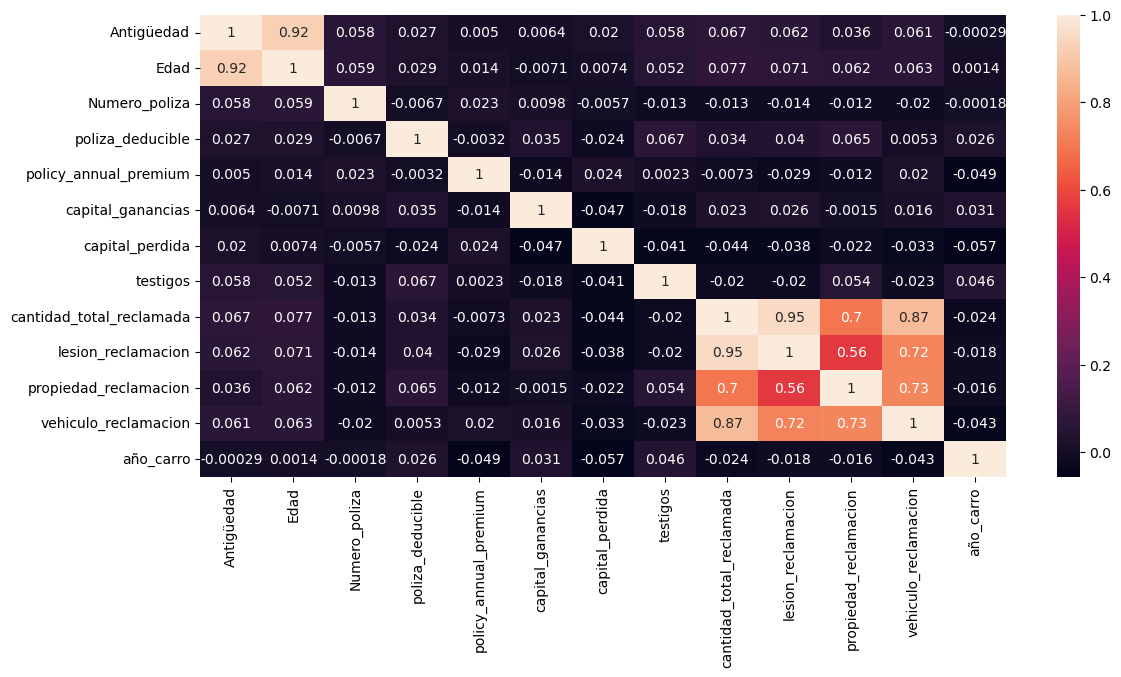

In [11]:
#Mapa de calor 
plt.figure(figsize=(13,6))
sns.heatmap(data.corr(),annot=True)
plt.show()

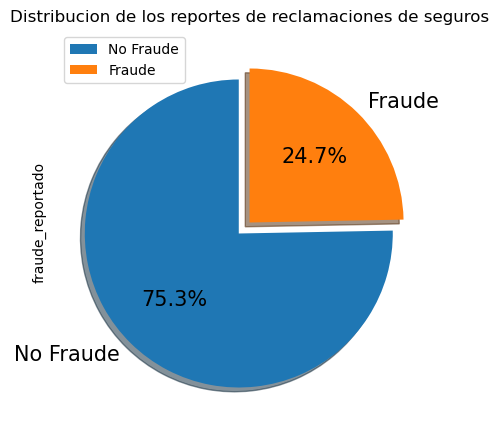

,fraude_reportado
N,753
Y,247


In [12]:
#Distribucion de los reportes de reclamaciones en seguros de automoviles
dtc = pd.DataFrame(data['fraude_reportado'].value_counts())

labels = 'No Fraude','Fraude'
plt.rcParams["figure.figsize"] = (5, 5)
dtc.reset_index(inplace=True)
              
dtc.plot(kind='pie', y='fraude_reportado', title= 'Distribucion de los reportes de reclamaciones de seguros', labels=labels, autopct='%1.1f%%',
         explode=(0.1, 0,), shadow=True, startangle=450, fontsize=15)   

plt.show()
dtc=pd.DataFrame(data['fraude_reportado'].value_counts())
dtc

C:\Users\necas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


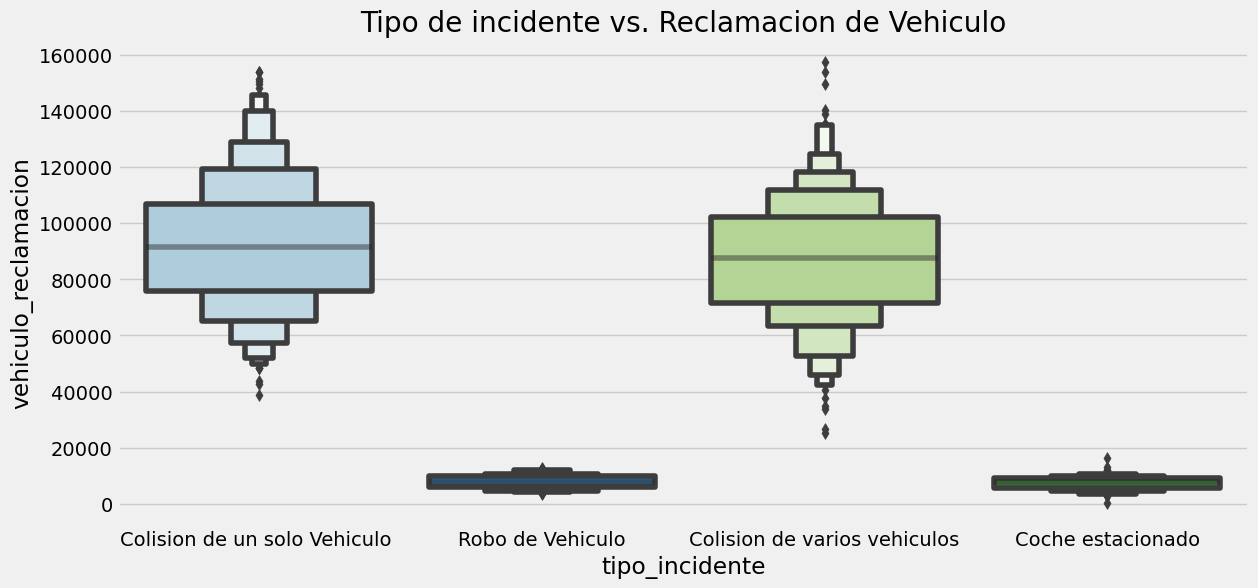

In [13]:
#Tipo de incidente Vs. Reclamacion de Vehiculo
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (13,6)
sns.boxenplot(data['tipo_incidente'], data['vehiculo_reclamacion'], 
              palette= 'Paired')
plt.title('Tipo de incidente vs. Reclamacion de Vehiculo')
plt.show()

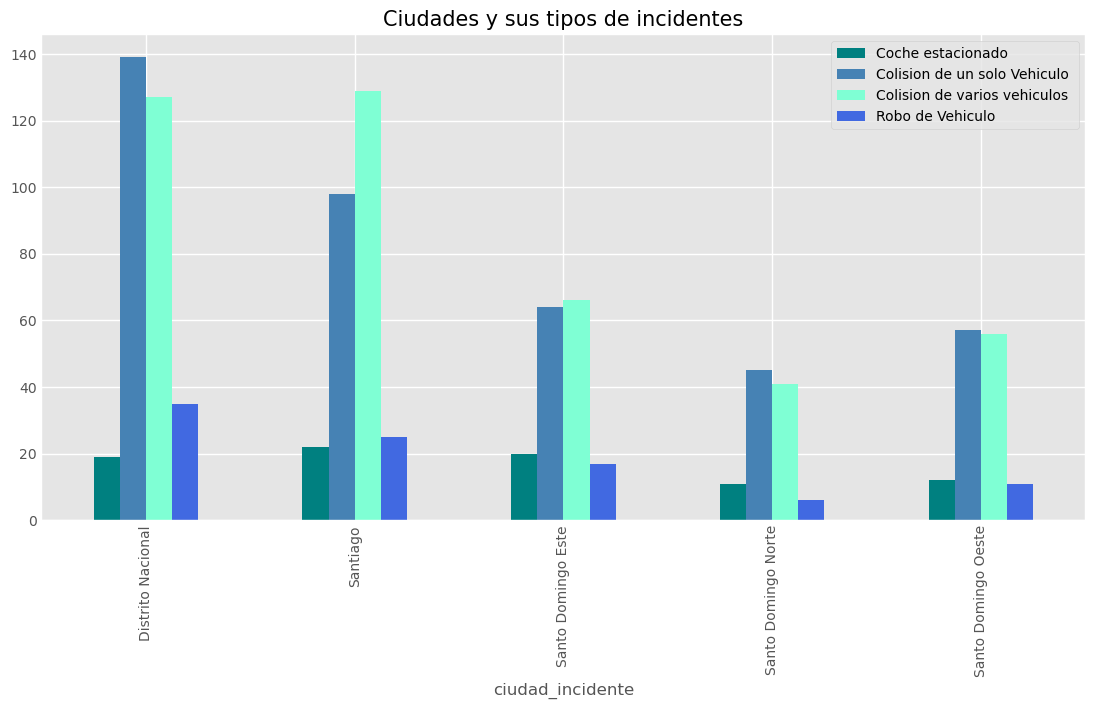

In [14]:
#Ciudades y sus tipos de incidentes
plt.style.use('ggplot')
incidente = pd.crosstab(data['ciudad_incidente'], data ['tipo_incidente'])
colors = ['Teal','Steelblue','Aquamarine','RoyalBlue']
incidente.plot(kind= 'bar',stacked= False,figsize=(12,6), color= colors)
plt.title('Ciudades y sus tipos de incidentes', fontsize = 15)
plt.legend()
plt.show()

C:\Users\necas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


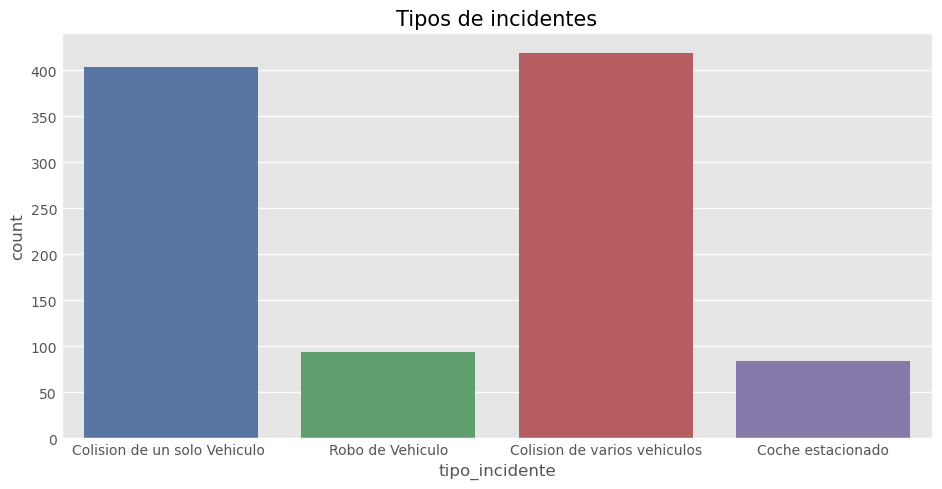

In [15]:
#Tipos de incidentes
plt.style.use('seaborn-deep')
plt.rcParams['figure.figsize'] = (10,5)


sns.countplot(data['tipo_incidente'])
plt.title('Tipos de incidentes', fontsize = 15)
plt.show()

## Analisis de comportamiento fraudulento


In [16]:
# Dataframe de reportes de fraude
fraude = data[data['fraude_reportado'] == 'Y']
fraude

,Antigüedad,Edad,Numero_poliza,Fecha_ingreso_poliza,provincia_poliza,poliza_limite,poliza_deducible,policy_annual_premium,sexo_cliente,nivel_educativo,...,autoridades_contactada,ciudad_incidente,testigos,cantidad_total_reclamada,lesion_reclamacion,propiedad_reclamacion,vehiculo_reclamacion,Marca_vehiculo,año_carro,fraude_reportado
0,328,48,521585,2014-10-17,Santo Domingo,5250/10500,53000,79566.23,Masculino,Maestria,...,Policia,Distrito Nacional,2,246338.4,117180.0,26040,103118.4,Saab,2004,Y
1,228,42,342868,2006-06-27,Santo Domingo,5250/10500,106000,68452.66,Masculino,Maestria,...,Policia,Distrito Nacional,0,22549.8,14040.0,1560,6949.8,Mercedes,2007,Y
3,256,41,227811,1990-05-25,Santo Domingo,5250/10500,106000,80034.22,Femenino,Bachillerato,...,Policia,Santo Domingo Este,2,227225.6,114120.0,12680,100425.6,Chevrolet,2014,Y
5,256,39,104594,2006-10-12,Santo Domingo,5250/10500,53000,76608.30,Femenino,PhD,...,Bomberos,Santo Domingo Este,2,229734.4,115380.0,12820,101534.4,Saab,2003,Y
14,180,38,644081,1998-12-28,Santo Domingo,5250/10500,106000,73959.89,Femenino,Universitario,...,Policia,Distrito Nacional,2,158928.0,75600.0,16800,66528.0,Dodge,2003,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
974,234,41,291006,1990-05-16,Santo Domingo,2100/6300,26500,55432.68,Masculino,Maestria,...,Policia,Distrito Nacional,1,436968.0,272160.0,15120,149688.0,Chevrolet,2007,Y
977,266,42,929306,2003-03-06,Santo Domingo,2100/10500,26500,62972.99,Masculino,Universitario,...,Ambulancia,Distrito Nacional,1,176800.8,79920.0,17760,79120.8,Suburu,2015,Y
982,230,43,490514,2007-02-09,Santo Domingo,10500/21000,106000,63396.99,Masculino,Universitario,...,Policia,Santo Domingo Este,3,186113.4,93420.0,20760,71933.4,BMW,2011,Y
986,232,42,182953,2013-04-30,Santo Domingo,2100/10500,26500,55033.59,Masculino,Universitario,...,Otro,Distrito Nacional,3,399322.0,277200.0,15400,106722.0,Toyota,2015,Y


C:\Users\necas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


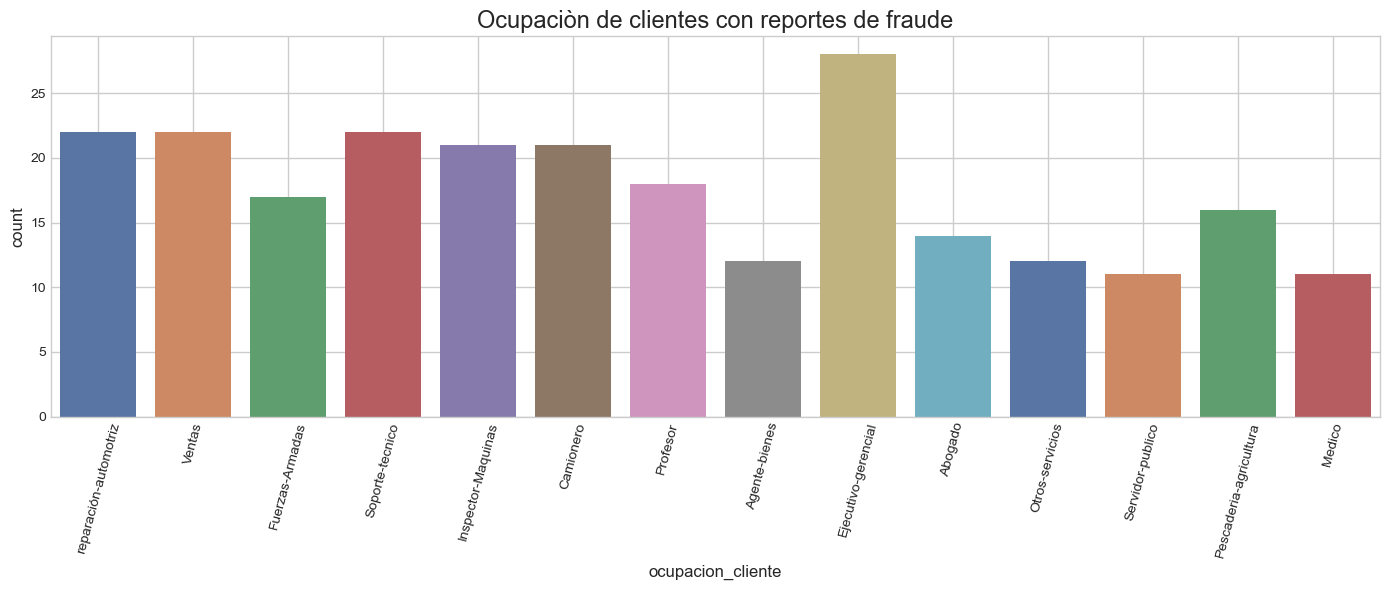

In [17]:
#Ocupacion de los clientes fraudulentos
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(14,6))
sns.countplot('ocupacion_cliente', data= fraude, palette='deep')
plt.title('Ocupaciòn de clientes con reportes de fraude', fontsize = 17)
plt.xticks(rotation=75)
plt.grid(True)
plt.tight_layout()
plt.show()

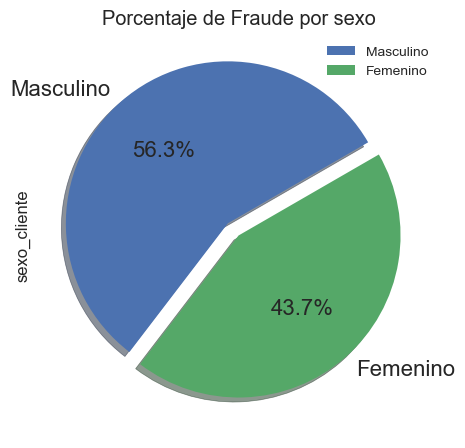

,sexo_cliente
Masculino,139
Femenino,108


In [18]:
# Porcentaje de fraude por sexo
fraude1 = pd.DataFrame(fraude['sexo_cliente'].value_counts())
fraude1.reset_index(inplace=True)
plt.rcParams["figure.figsize"] = (5, 5)
fraude1.plot(kind='pie',y='sexo_cliente', title= 'Porcentaje de Fraude por sexo',labels=fraude1['index'], autopct='%1.1f%%',explode=(0.1, 0,), 
             shadow=True, startangle=390, fontsize=16)      

plt.show()
fraude1=pd.DataFrame(fraude['sexo_cliente'].value_counts())
fraude1

C:\Users\necas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


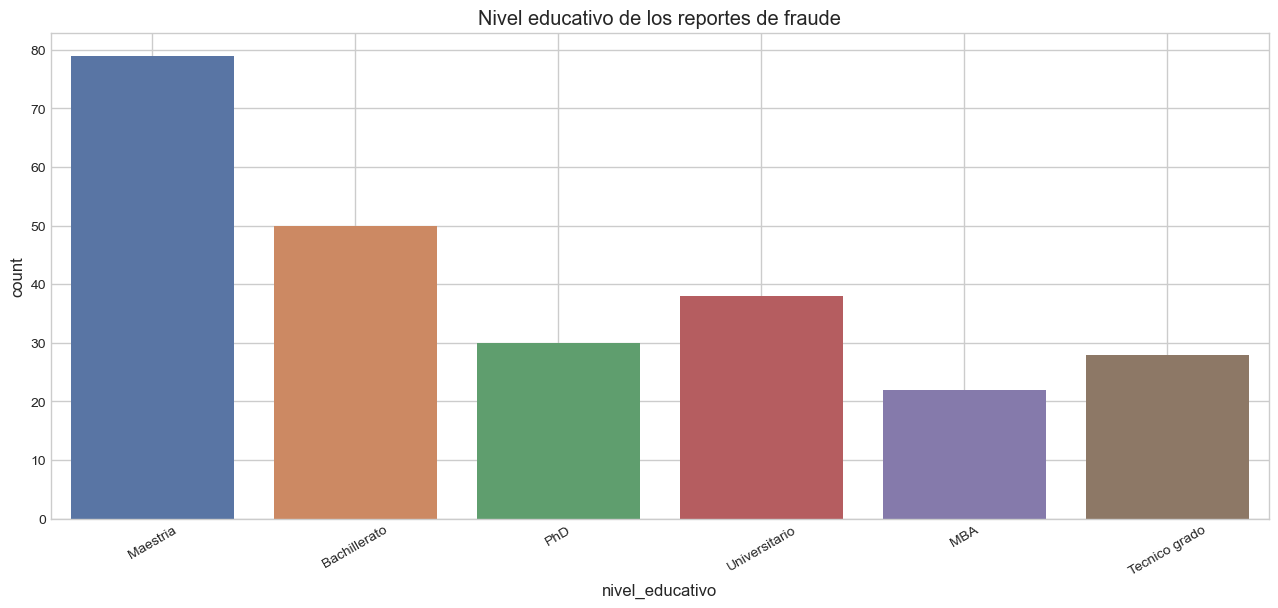

,nivel_educativo
Maestria,79
Bachillerato,50
Universitario,38
PhD,30
Tecnico grado,28
MBA,22


In [19]:
# Nivel educativo de las reclamaciones de fraude
plt.style.use('seaborn-bright')
plt.figure(figsize=(14,6))

sns.countplot('nivel_educativo', data= fraude, palette= 'deep')
plt.xticks(rotation=30)
plt.title('Nivel educativo de los reportes de fraude')
plt.grid(True)
plt.show()

ed=pd.DataFrame(fraude['nivel_educativo'].value_counts())
ed

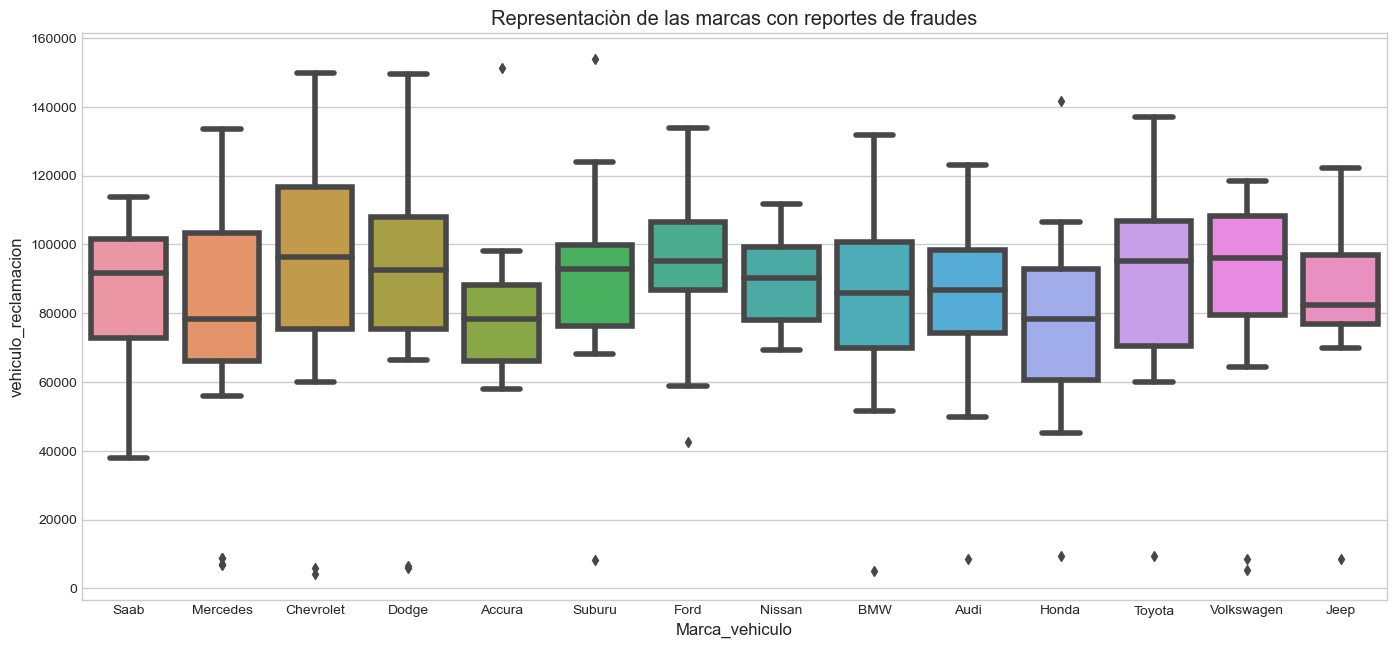

In [20]:
plt.figure(figsize=(15,7))
sns.boxplot(x='Marca_vehiculo', y='vehiculo_reclamacion',data=fraude)
plt.title('Representaciòn de las marcas con reportes de fraudes')
plt.show()

In [21]:
# Marcas con mas probabilidad de cometer fraude
mv=pd.DataFrame(fraude['Marca_vehiculo'].value_counts(normalize=True))
mv.head(10)

,Marca_vehiculo
Mercedes,0.089069
Ford,0.089069
Chevrolet,0.085020
Audi,0.085020
Dodge,0.080972
BMW,0.080972
Suburu,0.076923
Volkswagen,0.076923
Saab,0.072874
Nissan,0.056680


In [22]:
# Edades con mas probabilidad de fraude
edad=pd.DataFrame(fraude['Edad'].value_counts(normalize=True))
edad.head(10)

,Edad
41,0.064777
31,0.056680
34,0.052632
33,0.048583
32,0.044534
43,0.044534
38,0.044534
37,0.040486
39,0.040486
29,0.040486


# Algoritmos Machine Learning para la deteccion de fraudes en reclamaciones de seguros de automoviles

In [23]:
#Borrar algunas variables innecesarias
data = data.drop('Fecha_ingreso_poliza',axis=1)
data = data.drop('fecha_incidente',axis=1)
data = data.drop('Numero_poliza',axis=1)
data = data.drop('ciudad_incidente',axis=1)
data = data.drop('poliza_limite',axis=1)
data = data.drop('cantidad_total_reclamada',axis=1)
data = data.drop('autoridades_contactada',axis=1)
data = data.drop('provincia_poliza',axis=1)
data = data.drop('testigos',axis=1)

### Target

In [24]:
#Separando el target
X = data.iloc[:, 0: 16].values
y = data.iloc[:, 16].values #<---Target
print(X.shape)
print(y.shape)

(1000, 16)
(1000,)


In [25]:
# Dividir el conjunto de datos en el conjunto de entrenamiento y el conjunto de prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

print("shape of X_train: ", X_train.shape)
print("shape of X_test: ", X_test.shape)
print("shape of y_train: ", y_train.shape)
print("shape of y_test: ", y_test.shape)

shape of X_train:  (700, 16)
shape of X_test:  (300, 16)
shape of y_train:  (700,)
shape of y_test:  (300,)


In [26]:
# Transformando las variables categoricas
# Transformando la variable dependiente
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()

for i in range(0, 15):
    X_train[:,i] = labelencoder_X.fit_transform(X_train[:,i])

X_train[:,15] = labelencoder_X.fit_transform(X_train[:,15])

In [27]:
# Adaptando la variable dependiente
labelencoder_y = LabelEncoder()
y_train = labelencoder_y.fit_transform(y_train)

In [28]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

labelencoder_X = LabelEncoder()
for i in range(0, 15):
    X_test[:,i] = labelencoder_X.fit_transform(X_test[:,i])
X_test[:,15] = labelencoder_X.fit_transform(X_test[:,15])
# Encoding the Dependent Variable
labelencoder_y = LabelEncoder()
y_test = labelencoder_y.fit_transform(y_test)

In [29]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

#                      Classification Algorithms
## Logistic Regression

In [30]:
# Ajuste de la regresión logística al conjunto de entrenamiento
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 0)

#Ajuste
lr.fit(X_train, y_train)


# Predecir los resultados del conjunto de pruebas
y_pred = lr.predict(X_test)

# Measuring Accuracy
from sklearn import metrics
print('The accuracy of Logistic Regression is: ', metrics.accuracy_score(y_test,y_pred),'%')

The accuracy of Logistic Regression is:  0.76 %


In [31]:
#Matriz de confusion 
from sklearn.metrics import confusion_matrix
lr.cm = confusion_matrix(y_test, y_pred)
lr.cm

array([[214,   9],
       [ 63,  14]], dtype=int64)


True Positives(TP) =  214

True Negatives(TN) =  14

False Positives(FP) =  9

False Negatives(FN) =  63


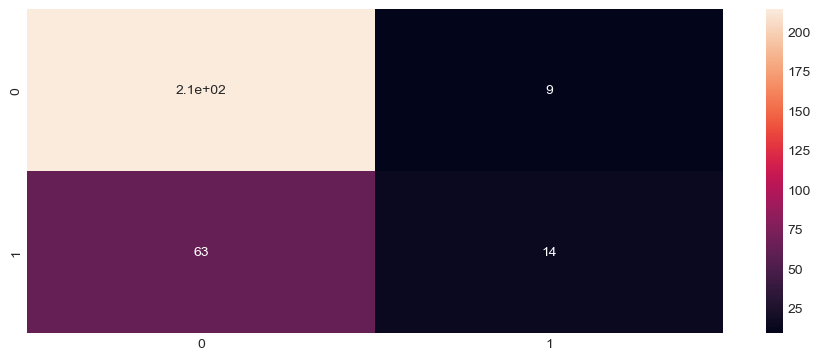

              precision    recall  f1-score   support

           0       0.77      0.96      0.86       223
           1       0.61      0.18      0.28        77

    accuracy                           0.76       300
   macro avg       0.69      0.57      0.57       300
weighted avg       0.73      0.76      0.71       300



In [32]:
print('\nTrue Positives(TP) = ', lr.cm[0,0])

print('\nTrue Negatives(TN) = ', lr.cm[1,1])

print('\nFalse Positives(FP) = ', lr.cm[0,1])

print('\nFalse Negatives(FN) = ', lr.cm[1,0])

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
plt.rcParams['figure.figsize'] = (10,4)
confusion_matrix(y_test, y_pred)
sns.heatmap(lr.cm, annot =True)
plt.show()

from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred)
print(cr)

## K-NN

In [33]:
# Ajuste K-NN al Conjunto de Entrenamiento
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn.fit(X_train, y_train)

# Predecir los resultados del conjunto de pruebas
y_pred = knn.predict(X_test)

# Measuring Accuracy
from sklearn.metrics import accuracy_score
print('The accuracy of KNN with is: ', metrics.accuracy_score(y_test,y_pred),'%')

The accuracy of KNN with is:  0.75 %


In [34]:
from sklearn.metrics import confusion_matrix
knn.cm = confusion_matrix(y_test, y_pred)
knn.cm

array([[206,  17],
       [ 58,  19]], dtype=int64)


True Positives(TP) =  206

True Negatives(TN) =  19

False Positives(FP) =  17

False Negatives(FN) =  58


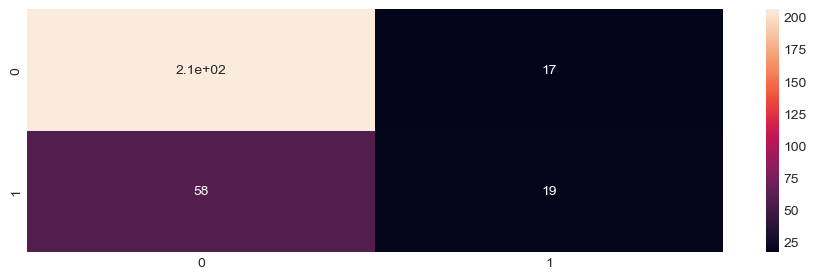

              precision    recall  f1-score   support

           0       0.78      0.92      0.85       223
           1       0.53      0.25      0.34        77

    accuracy                           0.75       300
   macro avg       0.65      0.59      0.59       300
weighted avg       0.72      0.75      0.72       300



In [35]:
#Matriz de confusion
print('\nTrue Positives(TP) = ', knn.cm[0,0])

print('\nTrue Negatives(TN) = ', knn.cm[1,1])

print('\nFalse Positives(FP) = ', knn.cm[0,1])

print('\nFalse Negatives(FN) = ', knn.cm[1,0])


from sklearn.metrics import confusion_matrix
plt.rcParams['figure.figsize'] = (10,3)
confusion_matrix(y_test, y_pred)
sns.heatmap(knn.cm, annot =True)
plt.show()

# Making the Confusion Matrix
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred)
print(cr)

# Decision Tree

In [36]:
# Ajuste de la clasificación del árbol de decisión al conjunto de entrenamiento
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion = 'entropy',  max_depth=3, random_state = 0)
# fit the model
dtree.fit(X_train, y_train)

# Predecir los resultados del conjunto de pruebas
y_pred = dtree.predict(X_test)

# Measuring Accuracy
from sklearn import metrics
print('The accuracy of Decision Tree Classifier with entropy is: ', metrics.accuracy_score(y_test,y_pred),'%')

The accuracy of Decision Tree Classifier with entropy is:  0.8166666666666667 %


In [37]:
from sklearn.metrics import confusion_matrix
treecm =confusion_matrix(y_test, y_pred)
treecm

array([[193,  30],
       [ 25,  52]], dtype=int64)


True Positives(TP) =  193

True Negatives(TN) =  52

False Positives(FP) =  30

False Negatives(FN) =  25


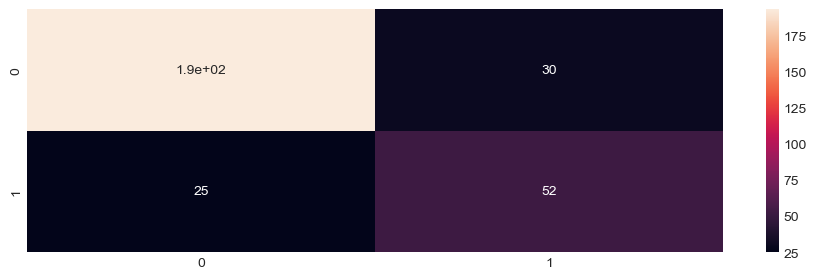

              precision    recall  f1-score   support

           0       0.89      0.87      0.88       223
           1       0.63      0.68      0.65        77

    accuracy                           0.82       300
   macro avg       0.76      0.77      0.76       300
weighted avg       0.82      0.82      0.82       300



In [38]:
print('\nTrue Positives(TP) = ', treecm[0,0])

print('\nTrue Negatives(TN) = ', treecm[1,1])

print('\nFalse Positives(FP) = ', treecm[0,1])

print('\nFalse Negatives(FN) = ', treecm[1,0])

from sklearn.metrics import confusion_matrix
plt.rcParams['figure.figsize'] = (10,3)
confusion_matrix(y_test, y_pred)
sns.heatmap(treecm, annot =True)
plt.show()
# Making the Confusion Matrix
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred)
print(cr)

# RANDOM FOREST

In [39]:
# Ajuste del Random Forest al conjunto de entrenamiento
from sklearn.ensemble import RandomForestClassifier
classifier= RandomForestClassifier()

classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Measuring Accuracy
from sklearn import metrics
print('The accuracy of Random Forest Classification is: ', metrics.accuracy_score(y_test, y_pred),'%')

The accuracy of Random Forest Classification is:  0.78 %


In [40]:
from sklearn.metrics import confusion_matrix
rfcm = confusion_matrix(y_test, y_pred)
rfcm

array([[204,  19],
       [ 47,  30]], dtype=int64)


True Positives(TP) =  204

True Negatives(TN) =  30

False Positives(FP) =  19

False Negatives(FN) =  47


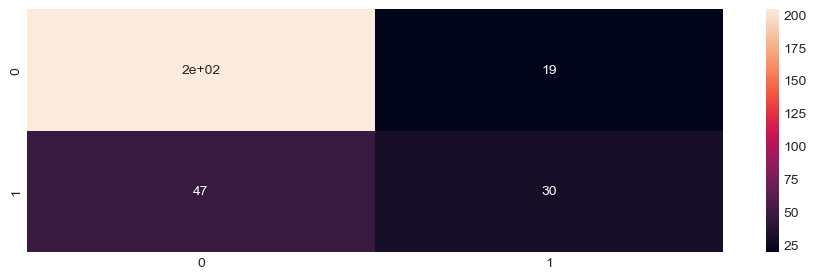

              precision    recall  f1-score   support

           0       0.81      0.91      0.86       223
           1       0.61      0.39      0.48        77

    accuracy                           0.78       300
   macro avg       0.71      0.65      0.67       300
weighted avg       0.76      0.78      0.76       300



In [41]:
print('\nTrue Positives(TP) = ', rfcm[0,0])

print('\nTrue Negatives(TN) = ', rfcm[1,1])

print('\nFalse Positives(FP) = ', rfcm[0,1])

print('\nFalse Negatives(FN) = ', rfcm[1,0])

from sklearn.metrics import confusion_matrix
plt.rcParams['figure.figsize'] = (10,3)
confusion_matrix(y_test, y_pred)
sns.heatmap(rfcm, annot =True)
plt.show()

# Making the Confusion Matrix
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred)
print(cr)

### Resultados:
La precision de Logistic Regression es: 76%

La precision de KNN es: 75%

La precision de Decision Tree Classifier es: 81.6%

La precision de Random Forest Classification es: 78.3%

### Nuestro mejor modelo es el Decision Tree, con un 81.6% de precision y con mejor recall que indica un balance entre las predicciones deseadas, y con menores falsos positivos que nos dan una mejor prediccion. Este modelo nos arroja mejores resultados en comparacion a los demas modelos probados.

## Probando el modelo

In [42]:
#Probando como predice
y_pred = dtree.predict(X_test)
y_predp = dtree.predict_proba(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted':y_pred})
df = df.head(10)
df

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,1,0
7,0,0
8,1,1
9,0,0


# Predicciones

In [43]:
#convertir el modelo en un archivo y cargarlo
import pickle
pkl_filename = "modelo_dtree.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(dtree, file)

In [44]:
#Antiguedad, Edad,provincia_poliza,poliza_deducible,policy_annual_premium,sexo_cliente,nivel_educativo,ocupacion_cliente,capital_ganancias,capital_perdida,tipo_incidente,severidad_incidente,testigos,cantidad_total_reclamada,lesion_reclamacion,propiedad_reclamacion,vehiculo_reclamacion,Marca_vehiculo,año_carro
recl1 = np.array([447,48,0,55000,99566.64,1,3,56940,0,4,1,104680.0,73040.0,113118.4,5,2005])

recl2 = np.array([80,25,0,89000,51984.54,0,4,101860,-196800,4,1,24380.0,1250.0,8979.2,12,2014])

#Probamos nuevos registros

In [45]:
modelo = pickle.load(open("modelo_dtree.pkl", "rb"))
modelo

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [46]:
#Prediccion 
#No fraude == 0
#Fraude == 1
modelo.predict([recl1,recl2])

array([0, 0])

In [47]:
#Probabilidades
pd.DataFrame(modelo.predict_proba([recl1,recl2]))

,0,1
0,0.892,0.108
1,0.892,0.108
